In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Initial known data (example data, replace with actual known data)
# E_Zn = -1.31 V, E_Mn = -1.55 V
initial_electropotentials = np.array([-1.60, -1.55, -1.40, -1.31, -1.25])
initial_yields = np.array([0.51, 0.73, 0.92, 0.52, 0.31])

lower_bound = -1.75
upper_bound = -0.75
noise = 0.05

### Linear interpolation for simulation

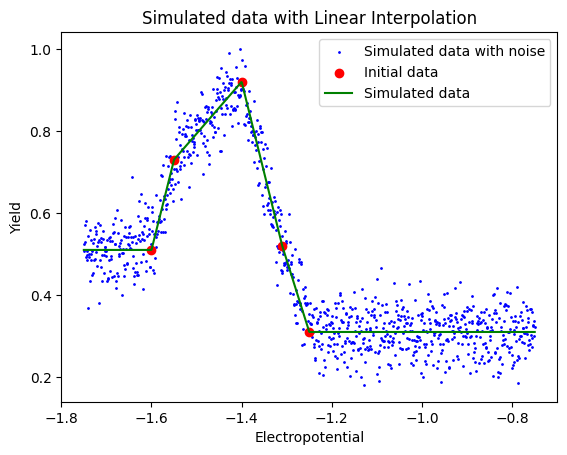

In [6]:
# Generate an array of electropotentials
electropotential_range = np.linspace(lower_bound, upper_bound, 1000)

# Linear interpolation function based on the initial data
linear_interpolation = np.interp(electropotential_range, initial_electropotentials, initial_yields)
linear_interpolation = np.clip(linear_interpolation, 0, 1)

# Add random noise to the interpolated yields
noisy_yields = linear_interpolation + np.random.normal(0, noise, len(electropotential_range))

# Clip the noisy yields to stay between 0 and 1
noisy_yields = np.clip(noisy_yields, 0, 1)

# Dictionary to store pre-generated yields for each electropotential
pre_generated_yields = dict(zip(electropotential_range, noisy_yields))

# Plot the noisy data
plt.scatter(electropotential_range, noisy_yields, label='Simulated data with noise', color='blue', s=1)
plt.scatter(initial_electropotentials, initial_yields, label='Initial data', color='red')
plt.plot(electropotential_range, linear_interpolation, label='Simulated data', color='green')
plt.xlabel('Electropotential')
plt.ylabel('Yield')
plt.title('Simulated data with Linear Interpolation')
plt.legend()
plt.show()

#### A Sum of multiple RBF functions to simulate multimodal function

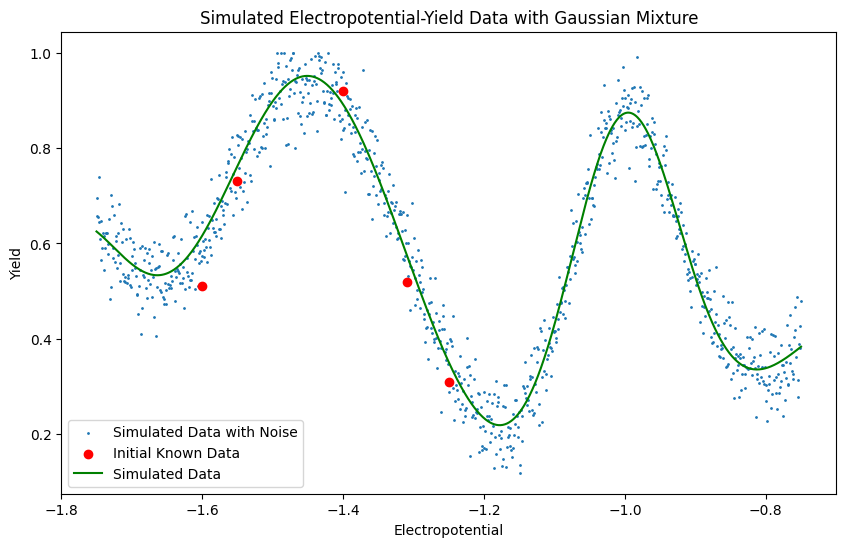

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a multimodal yield curve
def generate_multimodal_yield_curve(electropotentials, peaks, amplitudes, widths):
    yield_curve = np.zeros_like(electropotentials)
    for peak, amplitude, width in zip(peaks, amplitudes, widths):
        yield_curve += amplitude * np.exp(-0.5 * ((electropotentials - peak) / width) ** 2)
    return np.clip(yield_curve, 0, 1)  # Ensure the yields stay between 0 and 1

# Generate an array of electropotentials
electropotential_range = np.linspace(lower_bound, upper_bound, 1000)

# Parameters for the Gaussian mixtures (peaks, amplitudes, and widths)
peaks = [-1.8, -1.45, -1.0, -0.6]  # Example peak positions
amplitudes = [0.6, 0.95, 0.8, 0.5]  # Corresponding amplitudes
widths = [0.1, 0.14, 0.08, 0.2]     # Corresponding widths

# Generate the true yield curve
true_yields = generate_multimodal_yield_curve(electropotential_range, peaks, amplitudes, widths)
true_yields = np.clip(true_yields, 0, 1)  # Ensure the true yields stay between 0 and 1

# Add random noise to the true yields
noisy_yields = true_yields + np.random.normal(0, noise, len(electropotential_range))
noisy_yields = np.clip(noisy_yields, 0, 1)  # Ensure the noisy yields stay between 0 and 1

# Dictionary to store pre-generated yields for each electropotential
pre_generated_yields = dict(zip(electropotential_range, noisy_yields))

# Plot the noisy data
# mark the original data points

plt.figure(figsize=(10, 6))
plt.scatter(electropotential_range, noisy_yields, label='Simulated Data with Noise', s=1)
plt.scatter(initial_electropotentials, initial_yields, label='Initial Known Data', color='red')
plt.plot(electropotential_range, true_yields, label='Simulated Data', color='green')
plt.xlabel('Electropotential')
plt.ylabel('Yield')
plt.title('Simulated Electropotential-Yield Data with Gaussian Mixture')
plt.legend()
plt.show()

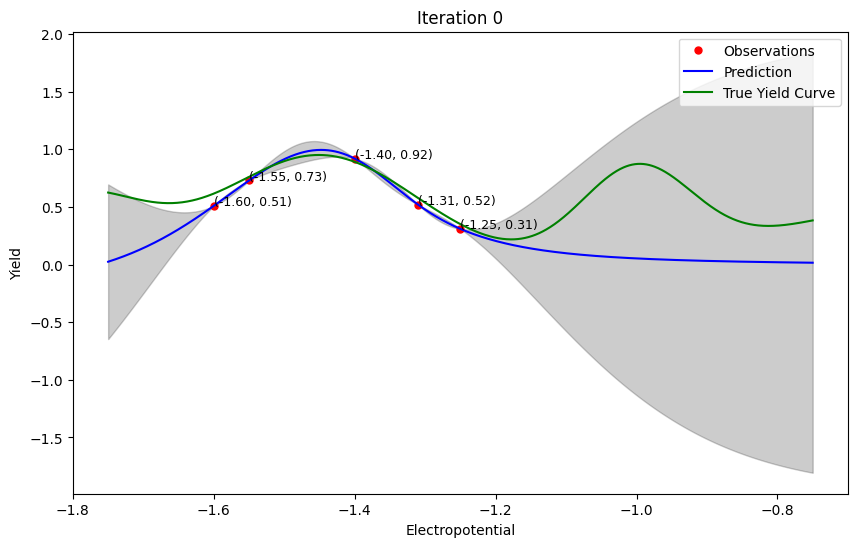

Iteration 1: Proposed Electropotential = -1.4484602859190019, Measured Yield = 0.8743412782464842, Maximum Yield = 0.92


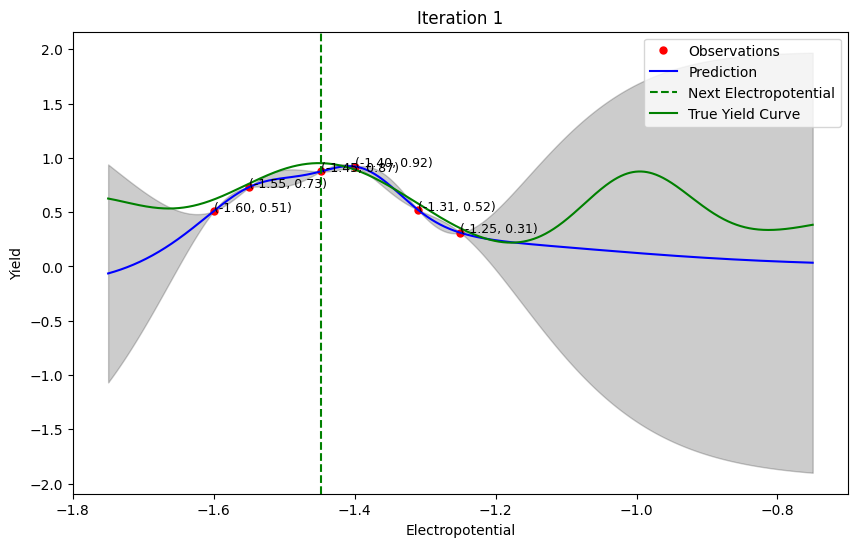

Iteration 2: Proposed Electropotential = -1.3531785951491435, Measured Yield = 0.762296295311667, Maximum Yield = 0.92


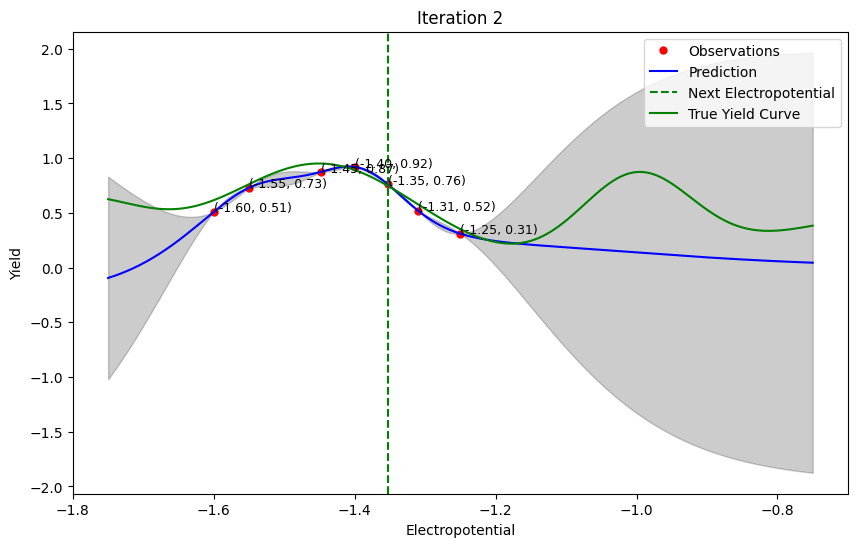

Iteration 3: Proposed Electropotential = -1.75, Measured Yield = 0.6946840062439938, Maximum Yield = 0.92


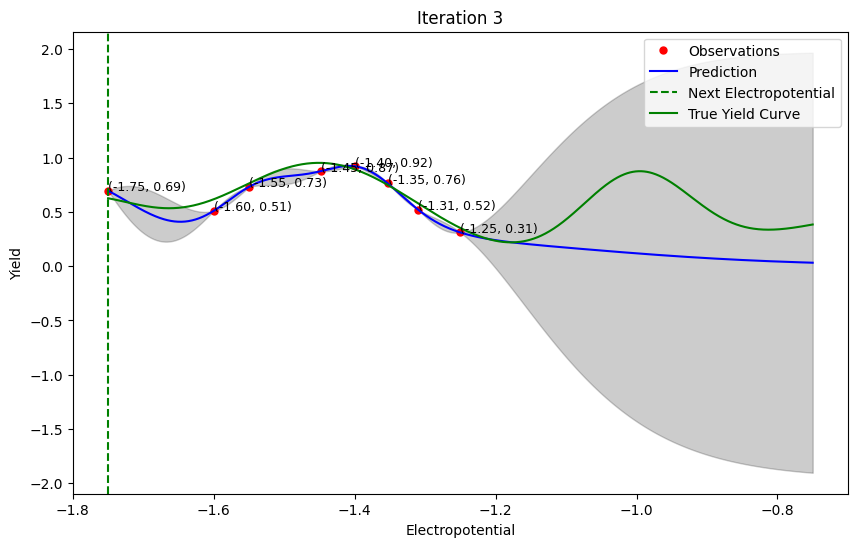

Iteration 4: Proposed Electropotential = -0.75, Measured Yield = 0.48027299470561186, Maximum Yield = 0.92


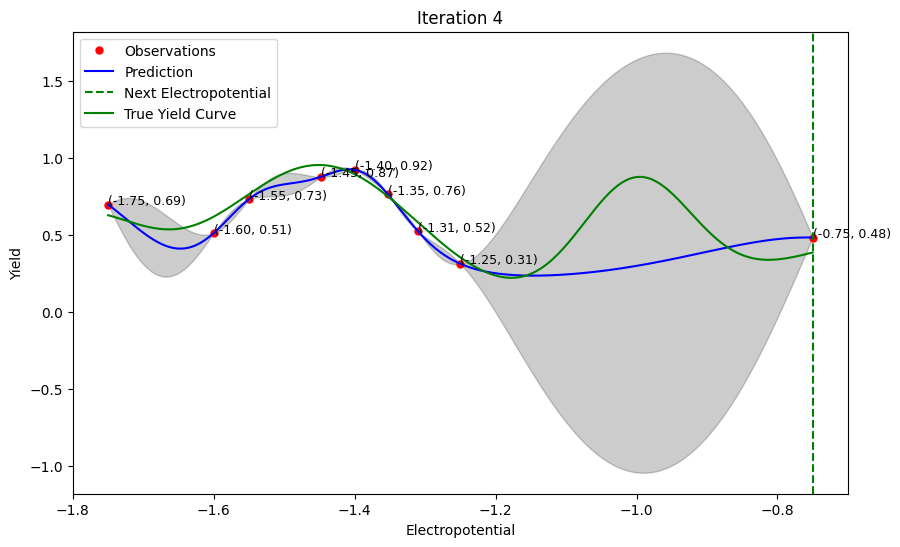

Iteration 5: Proposed Electropotential = -0.9519081383431738, Measured Yield = 0.760392501308605, Maximum Yield = 0.92


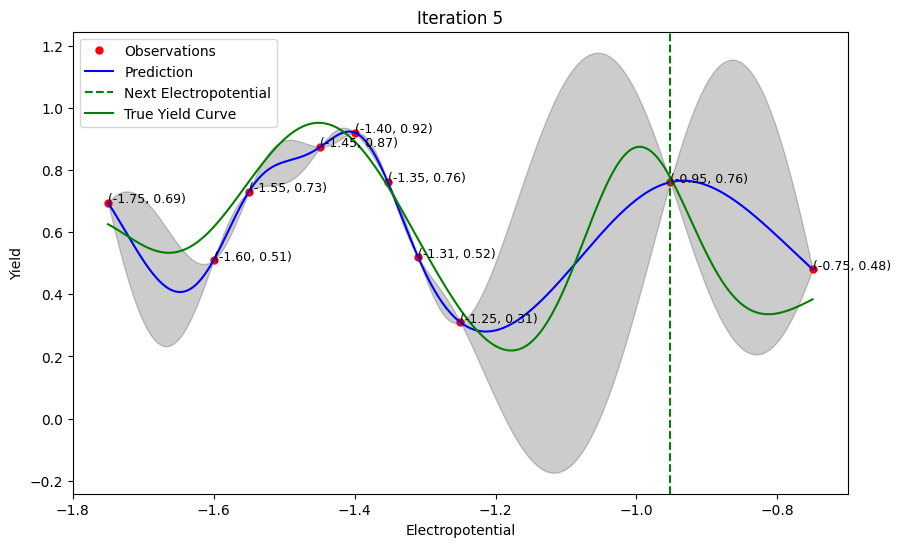

Iteration 6: Proposed Electropotential = -0.75, Measured Yield = 0.48027299470561186, Maximum Yield = 0.92


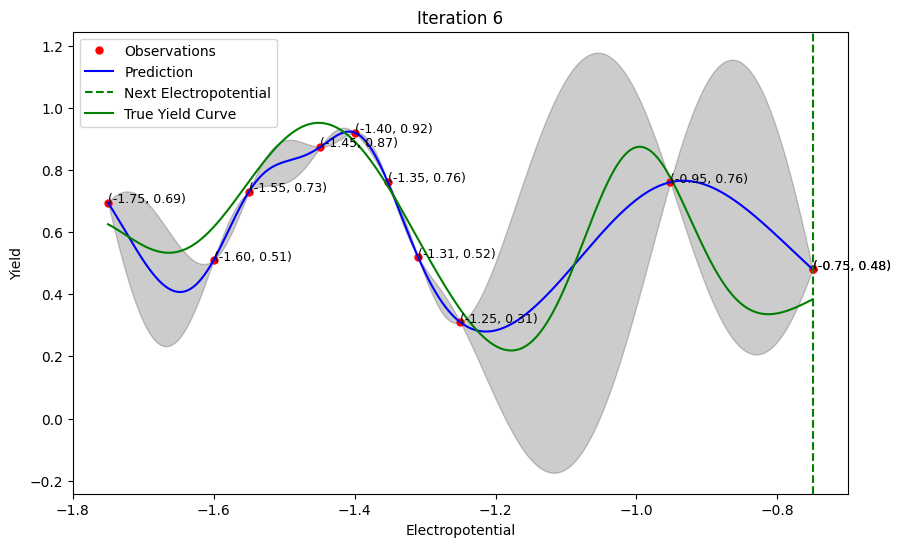

Iteration 7: Proposed Electropotential = -1.3820128885195637, Measured Yield = 0.885031670600551, Maximum Yield = 0.92


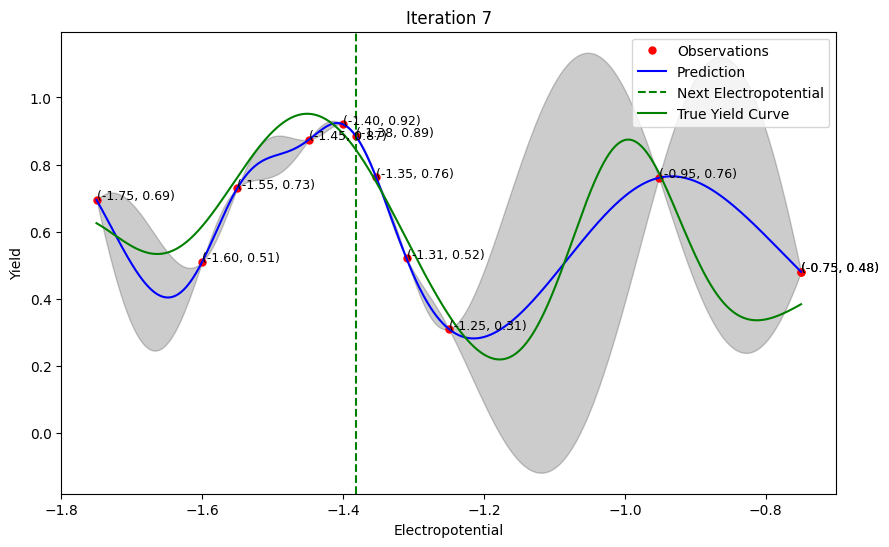

Iteration 8: Proposed Electropotential = -0.75, Measured Yield = 0.48027299470561186, Maximum Yield = 0.92


c:\Program Files\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


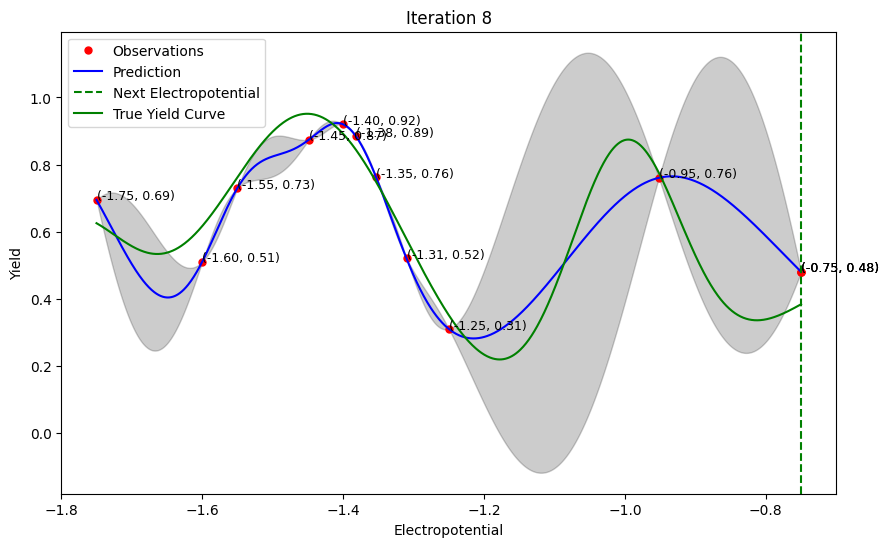

c:\Program Files\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Iteration 9: Proposed Electropotential = -0.75, Measured Yield = 0.48027299470561186, Maximum Yield = 0.92


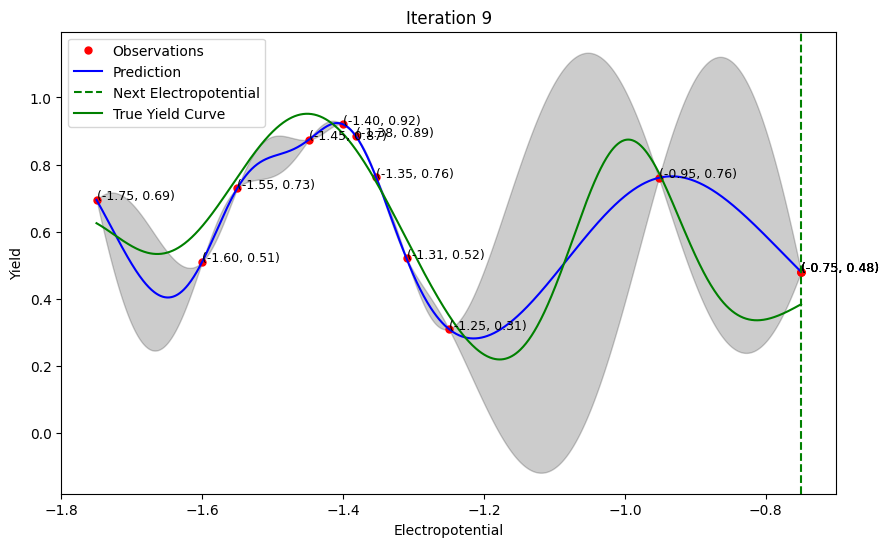

Iteration 10: Proposed Electropotential = -1.3456160942412347, Measured Yield = 0.7635388882683074, Maximum Yield = 0.92


c:\Program Files\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


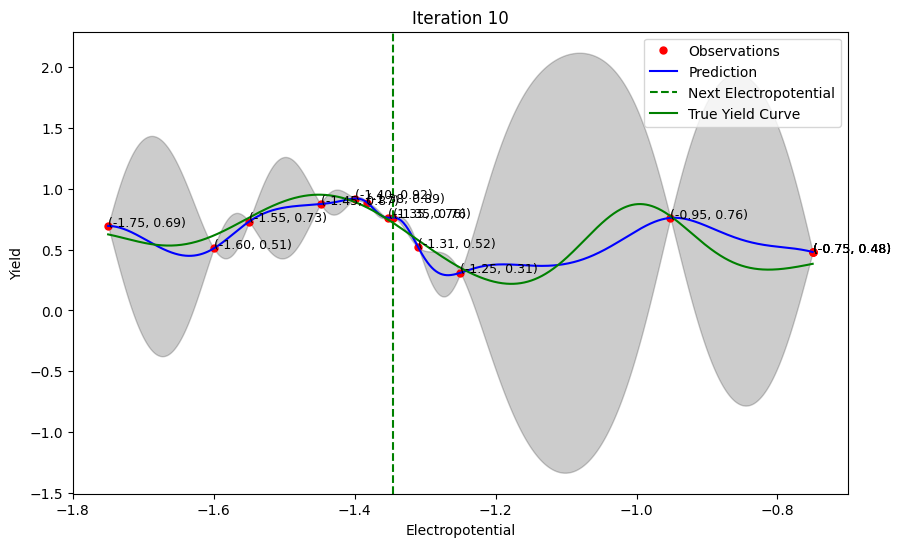

Optimal Electropotential: -1.4
Maximum Yield: 0.92


In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.optimize import minimize
from scipy.stats import norm

# Using Gaussian Process Regression for Bayesian Optimization
# Define Gaussian Kernel with Matern kernel
kernel = Matern(nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Acquisition function (Expected Improvement)
def expected_improvement(x, gp, y_max, xi=0.01):
    mu, sigma = gp.predict(x.reshape(-1, 1), return_std=True)
    with np.errstate(divide='warn'):
        imp = mu - y_max - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Function to fit the GP model
def fit_gp(electropotentials, yields):
    gp.fit(electropotentials.reshape(-1, 1), yields)
    return gp

# Function to find the closest pre-generated yield
def get_yield(electropotential, pre_generated_yields):
    keys = np.array(list(pre_generated_yields.keys()))
    closest_key = keys[np.argmin(np.abs(keys - electropotential))]
    return pre_generated_yields[closest_key]

# Bayesian Optimization Loop
def bayesian_optimization(n_iters, initial_electropotentials, initial_yields):
    # Fit the GP model with the initial data
    gp = fit_gp(initial_electropotentials, initial_yields)
    
    # Initialize variables
    y_max = max(initial_yields)
    X = initial_electropotentials
    Y = initial_yields

    # Plot the initial kernel curve
    plot_gp(gp, X, Y, None, 0)

    for i in range(n_iters):
        # Propose next point
        res = minimize(lambda x: -expected_improvement(x, gp, y_max), x0=[np.random.uniform(-2, 0)], 
                       bounds=[(lower_bound, upper_bound)], 
                       method='L-BFGS-B')
        
        # print(res)
        
        next_x = res.x[0]
        # Simulate yield measurement (replace this with actual experiment)
        next_y = get_yield(next_x, pre_generated_yields)
        
        # Update dataset
        X = np.append(X, next_x)
        Y = np.append(Y, next_y)
        
        # Update GP model
        gp = fit_gp(X, Y)
        
        # Update maximum yield
        y_max = max(Y)
        
        print(f"Iteration {i+1}: Proposed Electropotential = {next_x}, Measured Yield = {next_y}, Maximum Yield = {y_max}")

        # Plot the GP model and acquisition function
        plot_gp(gp, X, Y, next_x, i + 1)

    return X, Y

# Plotting function
def plot_gp(gp, X, Y, next_x, iteration):
    x = np.linspace(lower_bound, upper_bound, 1000).reshape(-1, 1)
    y_pred, sigma = gp.predict(x, return_std=True)
    

    
    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, 'r.', markersize=10, label='Observations')
    for i in range(len(X)):
        plt.text(X[i], Y[i], f'({X[i]:.2f}, {Y[i]:.2f})', fontsize=9)
    plt.plot(x, y_pred, 'b-', label='Prediction')
    plt.fill_between(x.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='k')
    if next_x is not None:
        plt.axvline(next_x, color='g', linestyle='--', label='Next Electropotential')

    # plot the true yield curve
    plt.plot(electropotential_range, true_yields, label='True Yield Curve', color='green')
    
    plt.title(f'Iteration {iteration}')
    plt.xlabel('Electropotential')
    plt.ylabel('Yield')
    plt.legend()
    plt.show()

# Run the Bayesian Optimization
final_electropotentials, final_yields = bayesian_optimization(10, initial_electropotentials, initial_yields)

print("Optimal Electropotential:", final_electropotentials[np.argmax(final_yields)])
print("Maximum Yield:", max(final_yields))